In [1]:
import os
import shutil
import seaborn as sns
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gpus = tf.config.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### preparing data into directories

Directories for the training, validation and test splits

In [7]:
full_data_dir = '../data/CatVsDogs/train'
base_dir = '../data/cat&dogs'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# os.mkdir(base_dir)
# os.mkdir(train_dir)
# os.mkdir(val_dir)
# os.mkdir(test_dir)

Directory with training cat pictures

In [3]:
train_cat_dir = os.path.join(train_dir, 'cat')
os.mkdir(train_cat_dir)

Directory with training dog pictures

In [4]:
train_dog_dir = os.path.join(train_dir, 'dog')
os.mkdir(train_dog_dir)

Directory with validation cat pictures

In [5]:
val_cat_dir = os.path.join(val_dir, 'cat')
os.mkdir(val_cat_dir)

Directory with validation dog pictures

In [6]:
val_dog_dir = os.path.join(val_dir, 'dog')
os.mkdir(val_dog_dir)

Directory with testing cat pictures

In [7]:
test_cat_dir = os.path.join(test_dir, 'cat')
os.mkdir(test_cat_dir)

Directory with testing dog pictures

In [8]:
test_dog_dir = os.path.join(test_dir, 'dog')
os.mkdir(test_dog_dir)

### Putting images to folders

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(val_cat_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(val_dog_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(full_data_dir, fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)

### creating network

In [18]:
network = Sequential()

network.add(Conv2D(32, (3, 3), activation=relu, input_shape=(150, 150, 3)))
network.add(MaxPooling2D((2, 2)))

network.add(Conv2D(64, (3, 3), activation=relu))
network.add(MaxPooling2D((2, 2)))

network.add(Conv2D(128, (3, 3), activation=relu))
network.add(MaxPooling2D((2, 2)))

network.add(Conv2D(128, (3, 3), activation=relu))
network.add(MaxPooling2D((2, 2)))

network.add(Flatten())
network.add(Dense(units=512, activation=relu))
network.add(Dense(units=1, activation=sigmoid))

network.compile(optimizer=RMSprop(),
                loss=binary_crossentropy,
                metrics=[binary_accuracy])

network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

### Data preprocessing

In [20]:
# rescale all images to 0 - 1
train_data_gen = ImageDataGenerator(rescale=1. / 255)
test_data_gen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_data_gen.flow_from_directory(directory=train_dir,
                                                     target_size=(150, 150),
                                                     batch_size=20,
                                                     class_mode='binary')
validation_generator = test_data_gen.flow_from_directory(directory=val_dir,
                                                         target_size=(150, 150),
                                                         batch_size=20,
                                                         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history = network.fit_generator(generator=train_generator,
                                steps_per_epoch=100,
                                epochs=30,
                                validation_data=validation_generator,
                                validation_steps=50)

C:\Users\hewar\AppData\Local\Temp/ipykernel_6436/3791249013.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(generator=train_generator,


Epoch 1/30
100/100 [==============================] - 30s 196ms/step - loss: 0.7605 - binary_accuracy: 0.5445 - val_loss: 0.6906 - val_binary_accuracy: 0.5160
Epoch 2/30
100/100 [==============================] - 10s 96ms/step - loss: 0.6767 - binary_accuracy: 0.6175 - val_loss: 0.6322 - val_binary_accuracy: 0.6450
Epoch 3/30
100/100 [==============================] - 10s 97ms/step - loss: 0.6124 - binary_accuracy: 0.6565 - val_loss: 0.6293 - val_binary_accuracy: 0.6630
Epoch 4/30
100/100 [==============================] - 9s 93ms/step - loss: 0.5605 - binary_accuracy: 0.7200 - val_loss: 1.0605 - val_binary_accuracy: 0.5920
Epoch 5/30
100/100 [==============================] - 10s 95ms/step - loss: 0.5373 - binary_accuracy: 0.7520 - val_loss: 0.6024 - val_binary_accuracy: 0.6940
Epoch 6/30
100/100 [==============================] - 9s 94ms/step - loss: 0.4754 - binary_accuracy: 0.7780 - val_loss: 0.6451 - val_binary_accuracy: 0.6990
Epoch 7/30
100/100 [==============================] -

In [22]:
network.save('../models/cats_and_dogs_1.h5')

Displaying curves of loss and accuracy during training

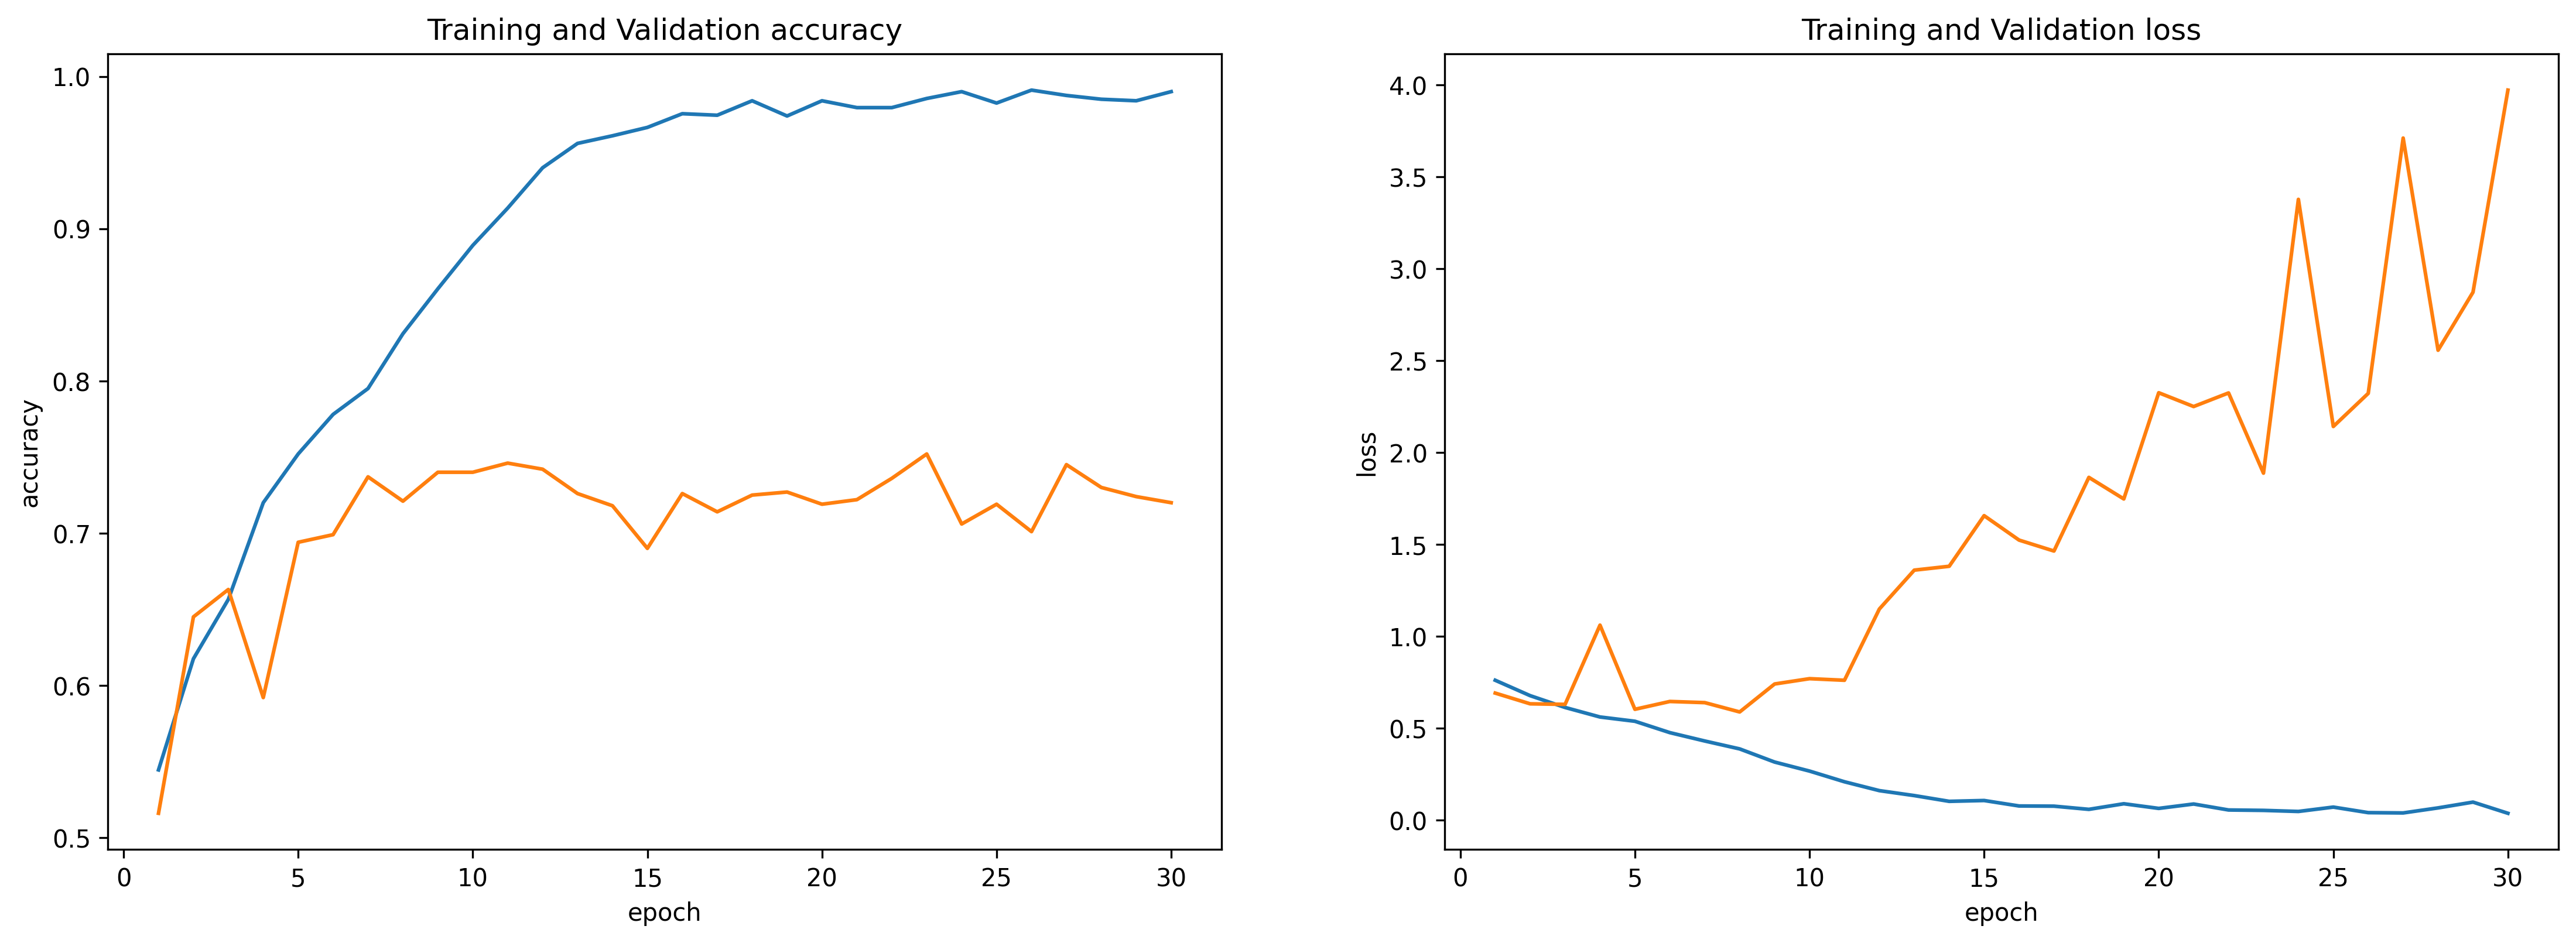

In [29]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
axes = axes.ravel()
epochs = list(range(1, 31))

sns.lineplot(x=epochs, y=history.history['binary_accuracy'], ax=axes[0])
sns.lineplot(x=epochs, y=history.history['val_binary_accuracy'], ax=axes[0])
axes[0].set_title('Training and Validation accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')

sns.lineplot(x=epochs, y=history.history['loss'], ax=axes[1])
sns.lineplot(x=epochs, y=history.history['val_loss'], ax=axes[1])
axes[1].set_title('Training and Validation loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')
plt.show()

#### Randomly augmented images

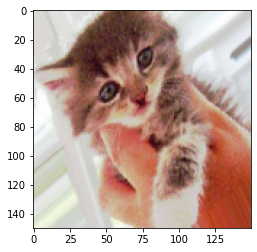

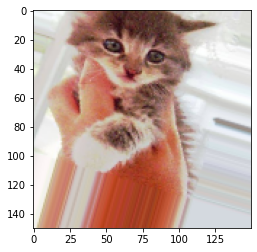

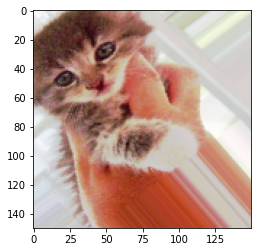

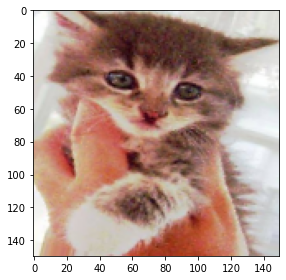

In [33]:
i = 0
fnames = [os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    img_plot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.tight_layout()
plt.show()

In [8]:
network_2 = Sequential()

network_2.add(Conv2D(32, (3, 3), activation=relu, input_shape=(150, 150, 3)))
network_2.add(MaxPooling2D((2, 2)))

network_2.add(Conv2D(64, (3, 3), activation=relu))
network_2.add(MaxPooling2D((2, 2)))

network_2.add(Conv2D(128, (3, 3), activation=relu))
network_2.add(MaxPooling2D((2, 2)))

network_2.add(Conv2D(128, (3, 3), activation=relu))
network_2.add(MaxPooling2D((2, 2)))

network_2.add(Flatten())
network_2.add(Dropout(0.5))
network_2.add(Dense(units=512, activation=relu))
network_2.add(Dense(units=1, activation=sigmoid))

network_2.compile(optimizer=RMSprop(),
                  loss=binary_crossentropy,
                  metrics=[binary_accuracy])

network_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [5]:
train_data_gen = ImageDataGenerator(rescale=1. / 255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True, )
test_data_gen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_data_gen.flow_from_directory(directory=train_dir,
                                                     target_size=(150, 150),
                                                     batch_size=20,
                                                     class_mode='binary')
validation_generator = test_data_gen.flow_from_directory(directory=val_dir,
                                                         target_size=(150, 150),
                                                         batch_size=20,
                                                         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history_2 = network_2.fit(train_generator,
                          steps_per_epoch=100,
                          epochs=100,
                          validation_data=validation_generator,
                          validation_steps=50)

Epoch 1/100
100/100 [==============================] - 23s 234ms/step - loss: 0.4923 - binary_accuracy: 0.7720 - val_loss: 0.4820 - val_binary_accuracy: 0.7710
Epoch 2/100
100/100 [==============================] - 19s 190ms/step - loss: 0.4975 - binary_accuracy: 0.7660 - val_loss: 0.4559 - val_binary_accuracy: 0.7820
Epoch 3/100
100/100 [==============================] - 19s 191ms/step - loss: 0.4850 - binary_accuracy: 0.7820 - val_loss: 0.4523 - val_binary_accuracy: 0.8020
Epoch 4/100
100/100 [==============================] - 19s 189ms/step - loss: 0.4891 - binary_accuracy: 0.7820 - val_loss: 0.4212 - val_binary_accuracy: 0.8010
Epoch 5/100
100/100 [==============================] - 19s 193ms/step - loss: 0.4884 - binary_accuracy: 0.7815 - val_loss: 0.4207 - val_binary_accuracy: 0.8150
Epoch 6/100
100/100 [==============================] - 20s 199ms/step - loss: 0.4547 - binary_accuracy: 0.7960 - val_loss: 0.4506 - val_binary_accuracy: 0.8140
Epoch 7/100
100/100 [===================

In [11]:
network_2.save('../models/cats_and_dogs_2.h5')

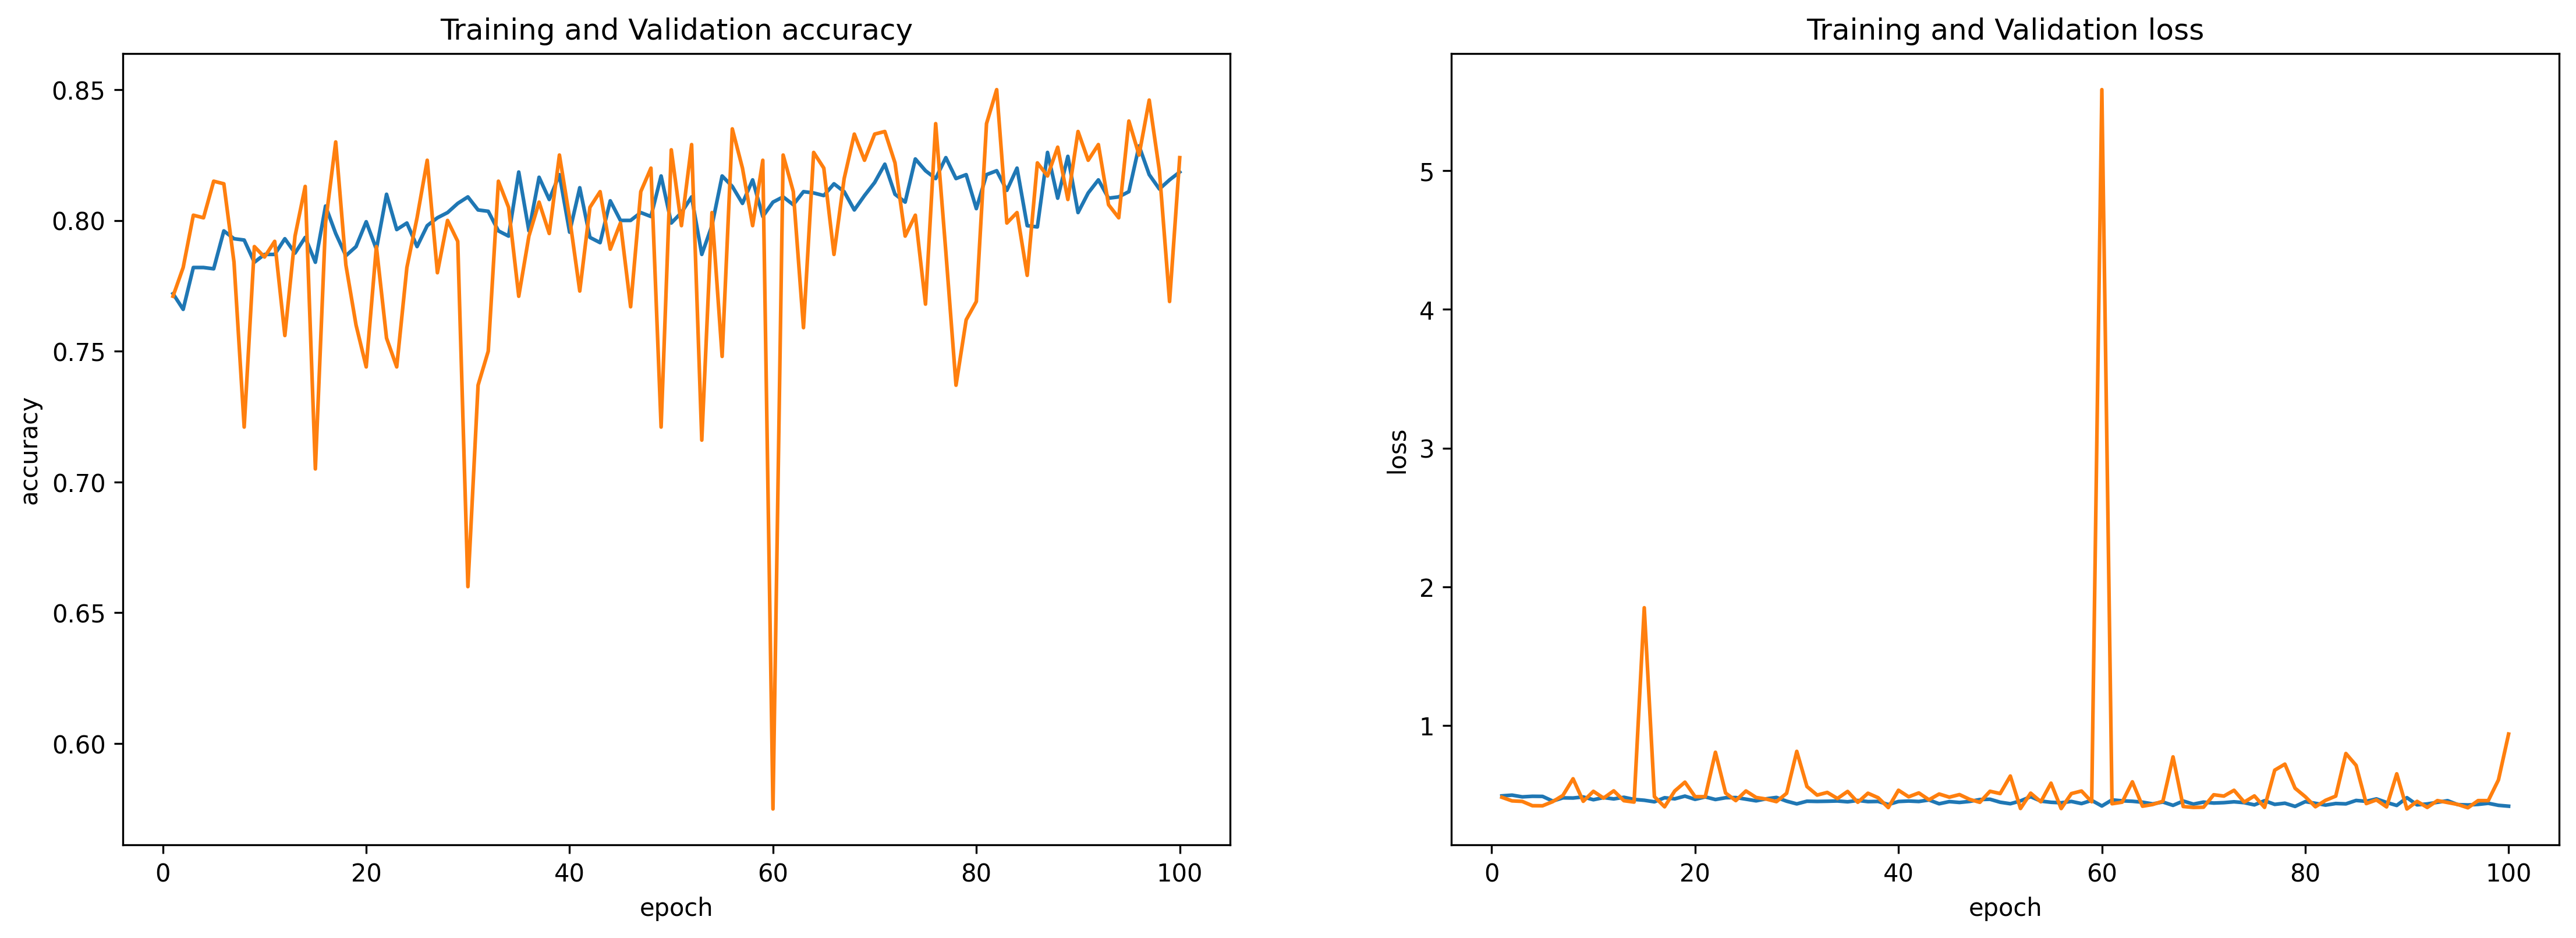

In [13]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
axes = axes.ravel()
epochs = list(range(1, 101))

sns.lineplot(x=epochs, y=history_2.history['binary_accuracy'], ax=axes[0])
sns.lineplot(x=epochs, y=history_2.history['val_binary_accuracy'], ax=axes[0])
axes[0].set_title('Training and Validation accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')

sns.lineplot(x=epochs, y=history_2.history['loss'], ax=axes[1])
sns.lineplot(x=epochs, y=history_2.history['val_loss'], ax=axes[1])
axes[1].set_title('Training and Validation loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')
plt.show()

In [3]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d6bbae143d832006294945121d1f1fc so we will re-download the data.
58900480/58889256 [==============================] - 553s 9us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856  

In [4]:
conv_base.trainable = False
network_3 = Sequential()

network_3.add(conv_base)
network_3.add(Flatten())
network_3.add(Dense(256, activation=relu))
network_3.add(Dense(1, activation=sigmoid))

network_3.compile(optimizer=RMSprop(),
                  loss=binary_crossentropy,
                  metrics=[binary_accuracy])

In [5]:
network_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
train_data_gen = ImageDataGenerator(rescale=1. / 255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_data_gen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_data_gen.flow_from_directory(directory=train_dir,
                                                     target_size=(150, 150),
                                                     batch_size=20,
                                                     class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(directory=val_dir,
                                                         target_size=(150, 150),
                                                         batch_size=20,
                                                         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history_3 = network_3.fit_generator(train_generator,
                                    steps_per_epoch=100,
                                    epochs=30,
                                    validation_data=validation_generator,
                                    validation_steps=50)

C:\Users\hewar\AppData\Local\Temp/ipykernel_23108/2487357569.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_3 = network_3.fit_generator(train_generator,


Epoch 1/30
100/100 [==============================] - 52s 422ms/step - loss: 0.8246 - binary_accuracy: 0.6805 - val_loss: 0.3319 - val_binary_accuracy: 0.8560
Epoch 2/30
100/100 [==============================] - 45s 449ms/step - loss: 0.5043 - binary_accuracy: 0.7675 - val_loss: 0.5799 - val_binary_accuracy: 0.7580
Epoch 3/30
100/100 [==============================] - 47s 471ms/step - loss: 0.4403 - binary_accuracy: 0.7990 - val_loss: 0.4375 - val_binary_accuracy: 0.8100
Epoch 4/30
100/100 [==============================] - 48s 484ms/step - loss: 0.3763 - binary_accuracy: 0.8290 - val_loss: 0.2523 - val_binary_accuracy: 0.8980
Epoch 5/30
100/100 [==============================] - 49s 493ms/step - loss: 0.3731 - binary_accuracy: 0.8325 - val_loss: 0.3035 - val_binary_accuracy: 0.8580
Epoch 6/30
100/100 [==============================] - 51s 510ms/step - loss: 0.3628 - binary_accuracy: 0.8435 - val_loss: 0.3516 - val_binary_accuracy: 0.8440
Epoch 7/30
100/100 [==========================

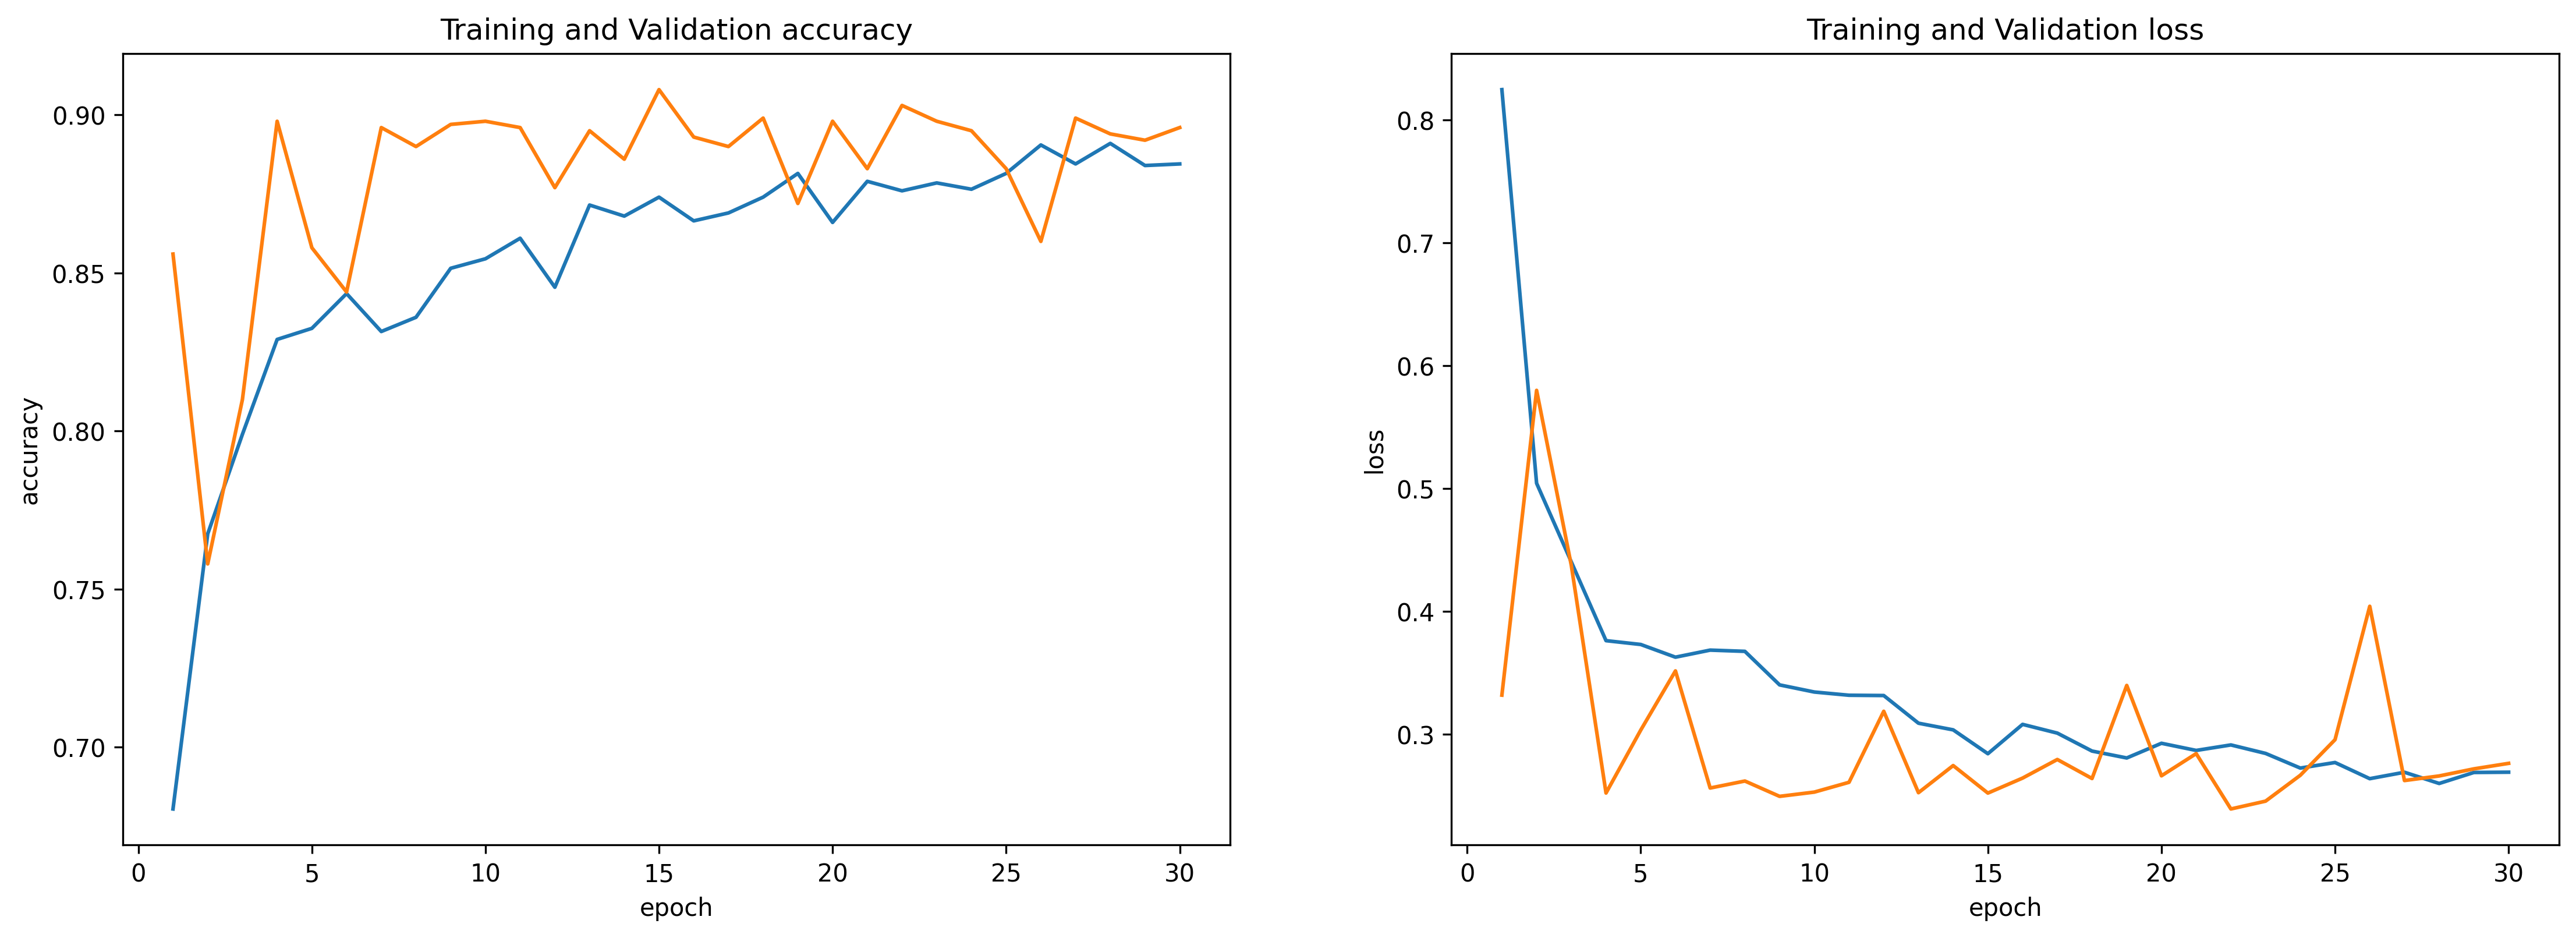

In [10]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
axes = axes.ravel()
epochs = list(range(1, 31))

sns.lineplot(x=epochs, y=history_3.history['binary_accuracy'], ax=axes[0])
sns.lineplot(x=epochs, y=history_3.history['val_binary_accuracy'], ax=axes[0])
axes[0].set_title('Training and Validation accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')

sns.lineplot(x=epochs, y=history_3.history['loss'], ax=axes[1])
sns.lineplot(x=epochs, y=history_3.history['val_loss'], ax=axes[1])
axes[1].set_title('Training and Validation loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')
plt.show()

In [11]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

network_3.compile(optimizer=RMSprop(learning_rate=1e-5),
                  loss=binary_crossentropy,
                  metrics=binary_accuracy)
network_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [12]:
history_3_1 = network_3.fit(train_generator,
                            steps_per_epoch=100,
                            epochs=100,
                            validation_data=validation_generator,
                            validation_steps=50)

Epoch 1/100
100/100 [==============================] - 54s 532ms/step - loss: 0.2524 - binary_accuracy: 0.8960 - val_loss: 0.2578 - val_binary_accuracy: 0.9090
Epoch 2/100
100/100 [==============================] - 51s 512ms/step - loss: 0.2457 - binary_accuracy: 0.8990 - val_loss: 0.2430 - val_binary_accuracy: 0.9080
Epoch 3/100
100/100 [==============================] - 54s 535ms/step - loss: 0.2046 - binary_accuracy: 0.9150 - val_loss: 0.2729 - val_binary_accuracy: 0.9050
Epoch 4/100
100/100 [==============================] - 56s 556ms/step - loss: 0.2060 - binary_accuracy: 0.9160 - val_loss: 0.2860 - val_binary_accuracy: 0.9080
Epoch 5/100
100/100 [==============================] - 58s 579ms/step - loss: 0.2052 - binary_accuracy: 0.9165 - val_loss: 0.2269 - val_binary_accuracy: 0.9210
Epoch 6/100
100/100 [==============================] - 62s 620ms/step - loss: 0.1839 - binary_accuracy: 0.9220 - val_loss: 0.2481 - val_binary_accuracy: 0.9150
Epoch 7/100
100/100 [===================

In [1]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
axes = axes.ravel()
epochs = list(range(1, 101))

sns.lineplot(x=epochs, y=history_3_1.history['binary_accuracy'], ax=axes[0])
sns.lineplot(x=epochs, y=history_3_1.history['val_binary_accuracy'], ax=axes[0])
axes[0].set_title('Training and Validation accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')

sns.lineplot(x=epochs, y=history_3_1.history['loss'], ax=axes[1])
sns.lineplot(x=epochs, y=history_3_1.history['val_loss'], ax=axes[1])
axes[1].set_title('Training and Validation loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')
plt.show()

NameError: name 'plt' is not defined